In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [12]:
%%capture
!pip install --upgrade scikit-learn

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [14]:
df = pd.read_csv('C:\\Users\\itsno\\Desktop\\Portfolio Projects\\portfolio_project_24_v1_decision_tree\\data\\processed.cleveland.data',header=None)

In [15]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [16]:
# Change the column numbers to column names 

df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']

In [17]:
df.head(5)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [18]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [19]:
# Print out the unique values in the column labeled "ca"

# The numbers printed reprecent the number of blood vessels that we lit up by fluoroscopy and the question marks represent missing data 

# Note the presence of a question mark which indicates missing data 

df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [20]:
# Print out the unique values in the column labeled "thal"

# The numbers printed represent the different diagnoses from the thalium heart scan, and question marks, which represent missing values

# Note the presence of a question mark which indicates missing data 

df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [24]:
# Since scikit-learn's classification trees do not support datasets with missing values, we need to figure out what do with the missing marks. 

# First, we need to print the number of rows that contain missing values

# 6 rows have missing data according to the output out of 303 total rows

len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [25]:
len(df)

303

In [29]:
# Rather than impute the missing rows (given the large nature of the dataset), we will remove the rows featuring missing data

df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [30]:
len(df_no_missing)

297

In [31]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [32]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [33]:
# Make a new copy of the columns used to make predictions

X = df_no_missing.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [34]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [35]:
# In order to use categorical variables with scikit learn Decision Trees we must use One-Hot Ecnoding 

X['cp'].unique()

array([1., 4., 3., 2.])

In [36]:
# We will use the get_dummies() to do One-Hot Encoding 

pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [38]:
# We use get_dummies() to do One-Hot Encoding on 4 columns and we save the results into a new dataframe labeled X_encoded

X_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal'])

In [41]:
# We can see that y has 5 unique values -- one for each level of heart disease

y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [43]:
# Our goal is to make a tree that predicts if someone has heart disease or not, so our goal now is to convert all number greater than 0 to 1
# We get the index for each non-zero value in y 
# We set each non-zero value in y to 1
# We verify that y only contains 0 and 1

y_not_zero_index = y > 0 
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

## Building a preliminary classification tree ##

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# Create a decision tree and fit it to the training data 
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(0.05172413793103448, 0.375, 'exang <= 0.5\ngini = 0.

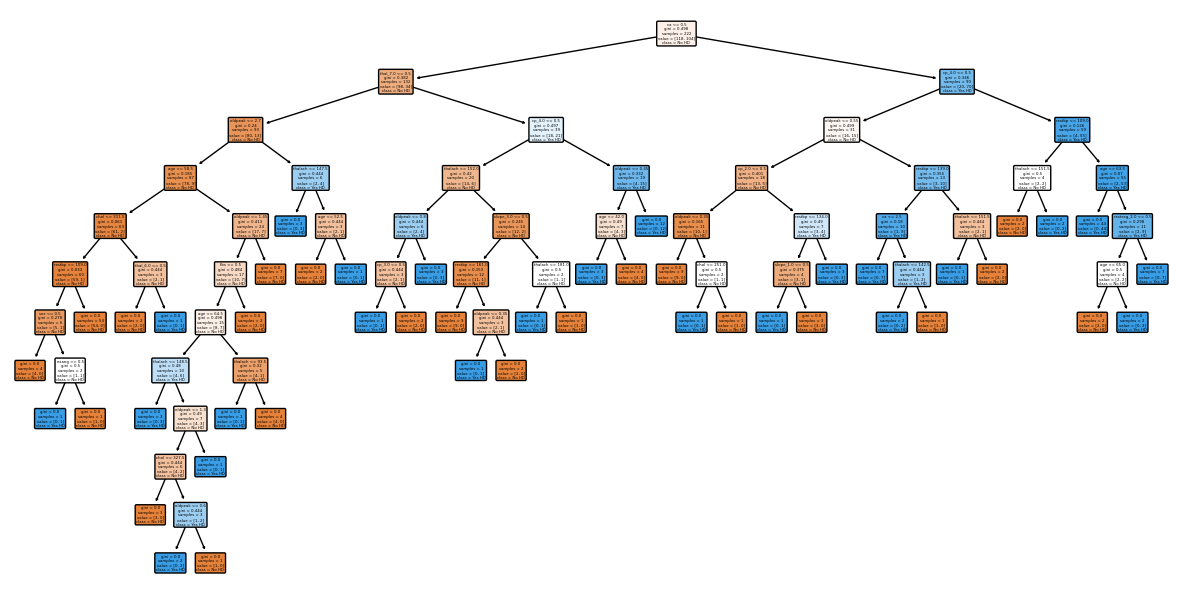

In [47]:
# We can plot the tree 
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
    filled=True,
    rounded=True,
    class_names=["No HD", "Yes HD"],
    feature_names=X_encoded.columns)

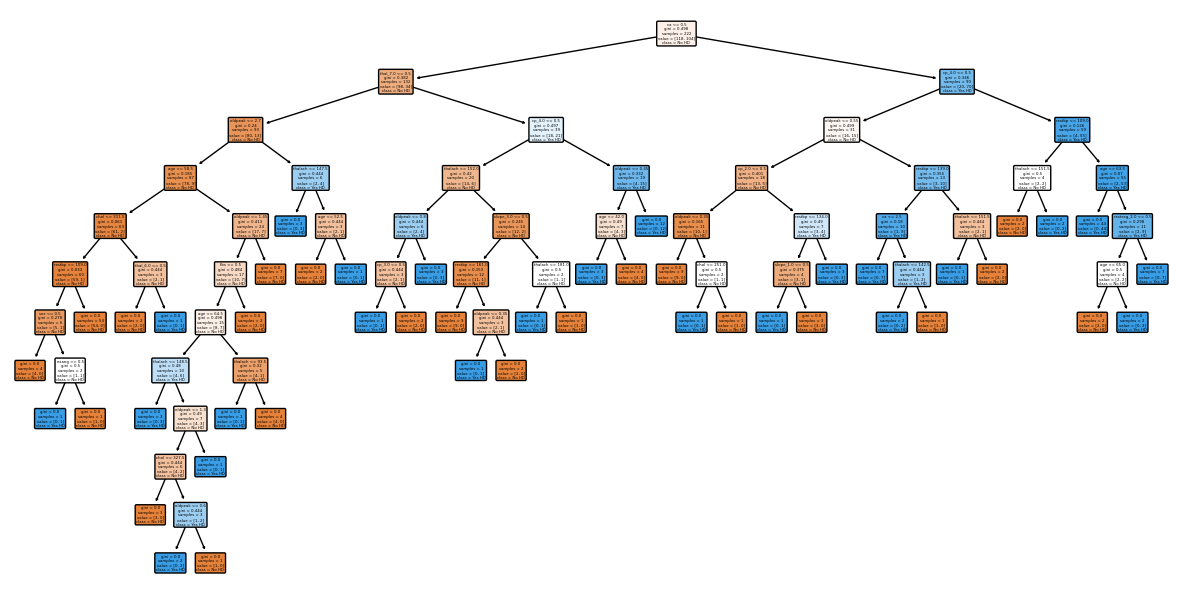

In [48]:
# Plot the tree
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns)

# Display the plot
plt.show()


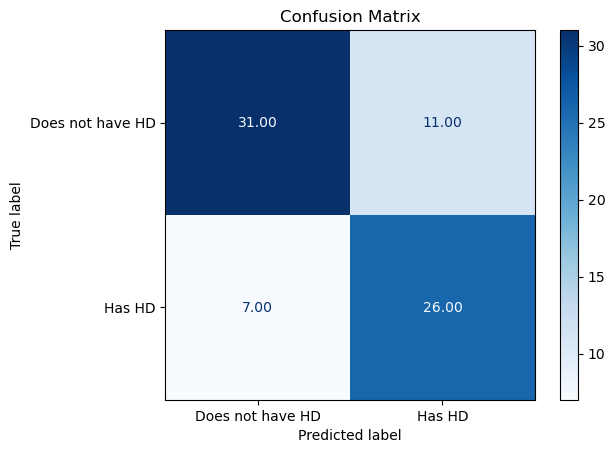

In [54]:
# We built a Classification Tree

# Let's examine how the Classification Tree performs on a testing dataset

# We run the testing dataset down the tree and draw a confusion matrix


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = clf_dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

class_labels = ["Does not have HD", "Has HD"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")

plt.show()


## Cost Complexity Pruning ##

In [55]:
# Decision Trees are notorious for being overfit to the Training Dataset 

# Pruning a tree with cost complexity pruning can simplify the process of finding a smaller tree that improves the accuracy with the Testing Dataset

# Pruining a decision tree is all about finding the right value for the pruning parameter alpha which controls how little or how much pruning happens 

path = clf_dt.cost_complexity_pruning_path(X_train, y_train) 
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

In [56]:
# Create one decision tree per value for alpha and store it in the array

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) 
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

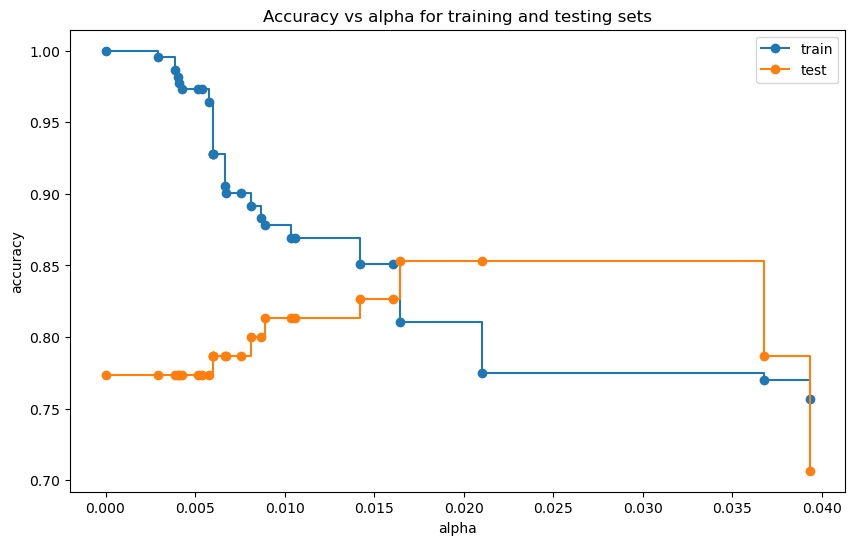

In [58]:
# Let's graph the accuracy of the trees using the Training Dataset and the Testing Dataset as a function of alpha

# In the graph below, we can see that the accuracy for the Testing Dataset hits a maximum value when alpha is about 0.016

# After 0.016, the accuracy of the Training Dataset drops off suggesting we should set ccp_alpha = 0.016

train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots(figsize=(10, 6))  # Specify the figure size

ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()


## Cost Complexity Pruning: Cross Validation For Finding The Best Alpha ## 

<Axes: xlabel='tree'>

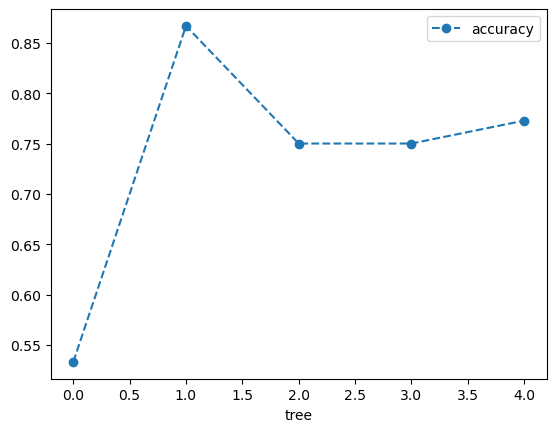

In [59]:
# We will now create the tree with ccp_alpha = 0.016

# 5-fold cross validation creates 5 different training and testing datasets that are then used to train and test the tree

clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) 

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [61]:
# The graph above shows that using different Training and Testing data with the same alpha results in different accuracies

# This suggests that alpha is sensitive to the datasets 

alpha_loop_values []

for ccp_alpha in ccp_alphas:
 clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
 scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
 alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
    columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
    y='mean_accuracy',
    yerr='std',
    marker='o',
    linestyle='--')

SyntaxError: invalid syntax (4255971310.py, line 5)

<Axes: xlabel='alpha'>

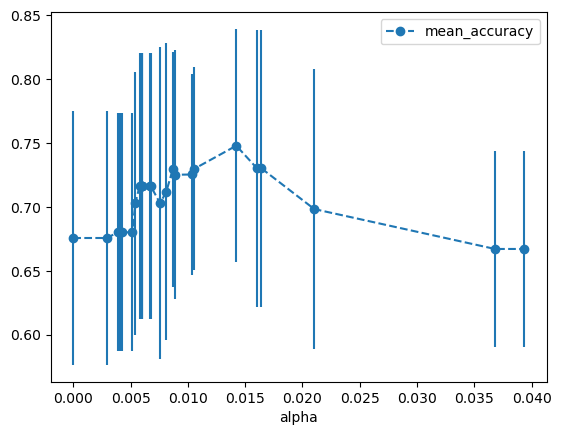

In [62]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')


In [64]:
# The graph above shows that instead of setting ccp_alpha = 0.016, we need to set it to something closer to 0.014

# We can find the exact value with 

alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [65]:
# We will store the ideal value for alpha 

# We will use the ideal alpha to the build the best tree

ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha']

ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [66]:
# Convert ideal_ccp_alpha from a series to a float

ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

## Building, Evaluating, Drawing, and Interpreting the Final Classification Tree ##

In [67]:
# We will build and train a new confusion mareix and decision tree, only this time we will use the optimal value for alpha

clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)

clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

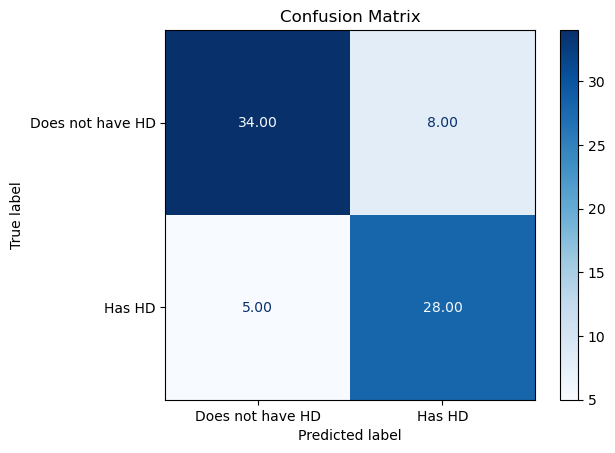

In [70]:
y_pred = clf_dt_pruned.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

class_labels = ["Does not have HD", "Has HD"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Confusion Matrix")

plt.show()


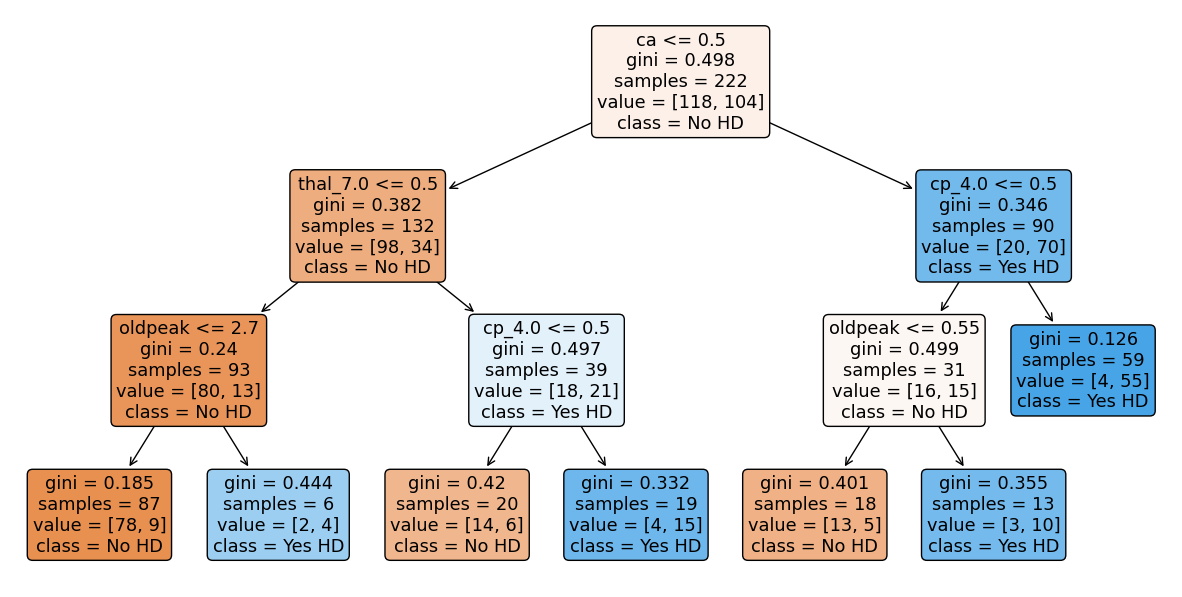

In [72]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["No HD","Yes HD"],
          feature_names=X_encoded.columns);